# Exploratory Data Analysis: Lending Club

This is an analysis of the **Lending Club** data, sourced from Kaggle. As an initial analysis, the goal is to gain a **preliminary understanding** of the data and trends, especially **"risky" loan trends**. Within this notebook, **only the accepted loans data** is explored. 

# Initial Hypotheses

* Do risky loans have higher interest rates?
* Do longer loans have lower interest rates?
* How does the loan length relate to risk?
* Do risky loans have lower grades?
* Does renting vs. owning vary with risk?
* Are individuals riskier than joint loans?
* Do risky loans have lower levels of employment verification?
* Is there a loan purpose that is riskier?
* Do risky loans have lower FICO scores?
* Are interest rates higher for loans created in the winter?

In [1]:
from EDA_class import EDA
import pandas as pd

df = pd.read_csv(r'data\accepted_2007_to_2018q4.csv\accepted_2007_to_2018q4.csv')
# There are rows that do not have loan information, remove these
df = df[~df["loan_amnt"].isna()]

eda_fns = EDA(df)

C:\Users\acoel\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# Defining Risky
For this analysis, risky loans will be defined as loans that are **late (31-120 days)** or **defaulted**. Depending on business goals, risky loans can be redefined to better address varying challenges (e.g., excluding paid loans or including all late loans).

In [2]:
eda_fns.risk()

,Count,Amount
Loan Status,,
Fully Paid,"1,076,751","$15,219,196,825"
Current,"878,317","$14,002,846,250"
Charged Off,"268,559","$4,180,135,725"
Late (31-120 days),"21,467","$363,792,975"
In Grace Period,"8,436","$149,085,700"
Late (16-30 days),"4,349","$75,633,975"
Does not meet the credit policy. Status:Fully Paid,"1,988","$17,600,225"
Does not meet the credit policy. Status:Charged Off,761,"$7,250,225"
Default,40,"$574,025"


# Preliminary Understanding
* Loans range from \\$500 to \\$40k with a median of \\$12,900
* Most loans are 3 years (about two-thirds are 36 months, one-third are 60 months)

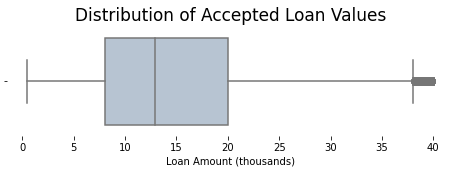

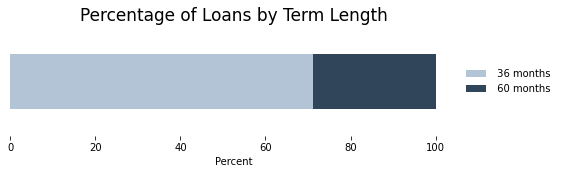

In [3]:
eda_fns.preliminary()

# EDA

### Do risky loans have higher interest rates?
If a loan carries more risk, then a higher interest rate would be assigned to compensate for this risk of missed payments. The interest rates assigned appear to have correctly given loans that are risky higher interest rates.
**Risky loans do have higher interest rates.**

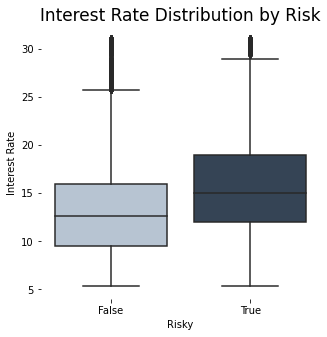

In [4]:
eda_fns.risk_and_rates()

### How does the loan length relate to risk?
Longer loans typically have smaller payments at lower rates of interest because they are seen as less risky. Within the data, **risky loans are mostly shorter loans but contain a higher percentage of long loans** than the non-risky loans.

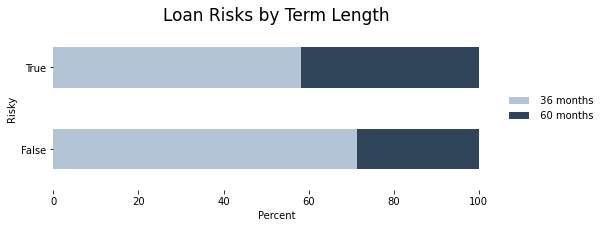

In [5]:
eda_fns.risk_and_length()

### How are risk, length, and interest related?
Digging into loan length further, the relationship between risk, interest, and length is explored. Typically, longer loans have lower risks as the payments are often smaller, spread out over time and therefore easier to meet. However, here it appears that **risk and length both increase the interest rate**. Perhaps these loans have the same size payments as shorter loans, but for longer, making them riskier. 

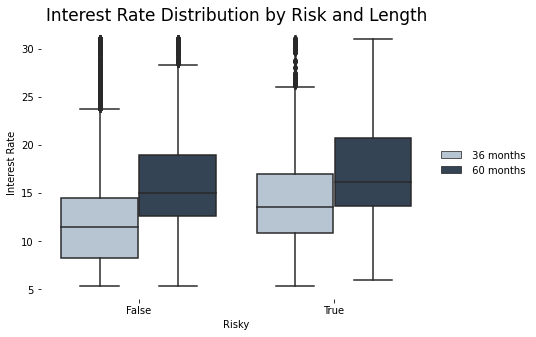

In [6]:
eda_fns.risk_and_length_and_rates()

### Do risky loans have lower grades?
Grades should be assigned according to risk, but do they really reflect risky loans? In this this dataset it appear that yes, the **risky loans have a lower grades**, so the grades are correctly reflect this risk. Most of the risky loans have a C grade, compared to most non-risky loans having a B grade.

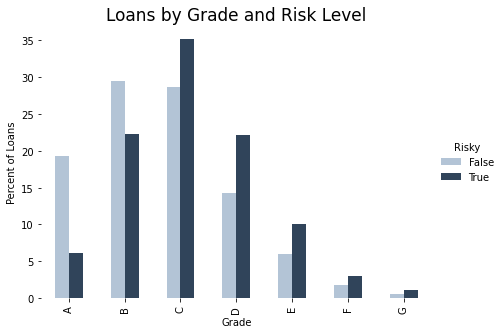

In [7]:
eda_fns.risk_and_grade()

### Does renting vs. owning vary with risk?
Owning a home can be viewed as successfully meeting financial goals - being financially responsible, less risky. In this data, **risky loans do have a higher percentage of renters**, and non-risky has a higher percentage of those with a mortgage. Surprisingly, risky loans have a higher percent of those that own their homes. Perhaps this is due to people who inherited homes and never had to be responsible for a mortgage, but that likely does not encompass all these loans.

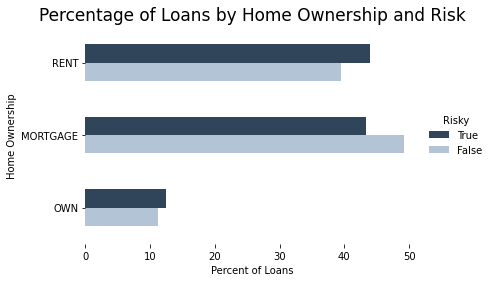

In [8]:
eda_fns.risk_and_home_ownership()

### Are individual loans riskier than joint loans?
Joint loans have multiple people who are able to financially contribute to payments, so they may be less likely to miss payments. However, **risky loans have a slightly higher percentage of joint loans**.

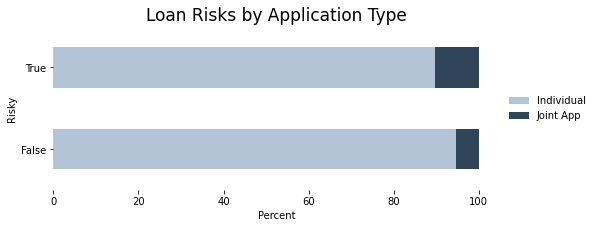

In [9]:
eda_fns.risk_and_joint_v_individual()

### Do risky loans have lower levels of employment verification?
Employment verification takes resources, but does it really have any reflection on risky loans or non-risky loans? It appears that **employment verification status does not vary between risk levels**.

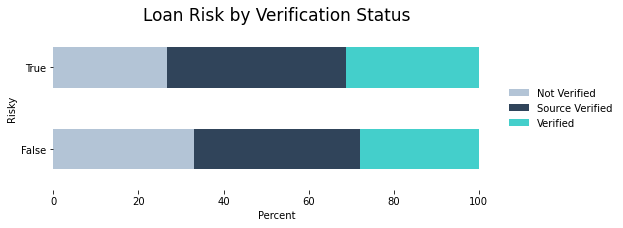

In [10]:
eda_fns.risk_and_verification()

### Is there a loan purpose that is riskier?
Most purposes do not have substantial differences between risky and non-risky loans. Interestingly, **debt consolidation does compose of a slightly higher percent of risky loans, but for credit card payments it is the reverse**. A purpose of 'other' does compose of more of the risky loans, so an effort to force explicit explanations should perhaps be made.

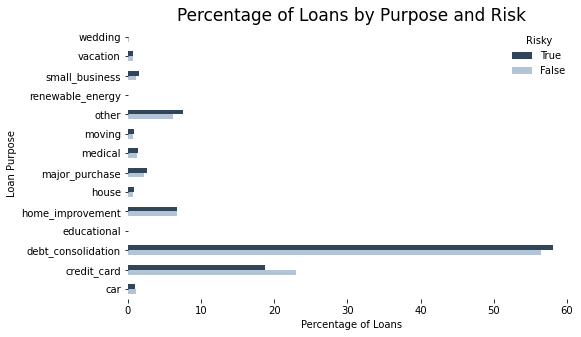

In [11]:
eda_fns.risk_and_purpose()

### Do risky loans have lower FICO scores?
Lower FICO scores are associated with missed payments, so risky loans likely would have lower scores. In this dataset, **the risky loans do have lower scores**.

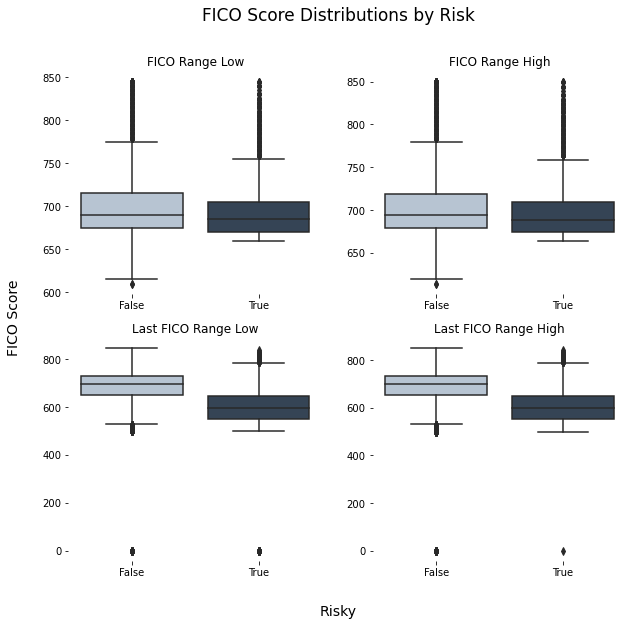

In [12]:
eda_fns.interest_and_FICO()

### Are interest rates higher for loans created in the winter?
Interest rates may be cyclical, perhaps increasing in the winter. Here, it seems **interest rates do not vary with the season the loan was created**. Time series relationships could be further explored in future analyses. 

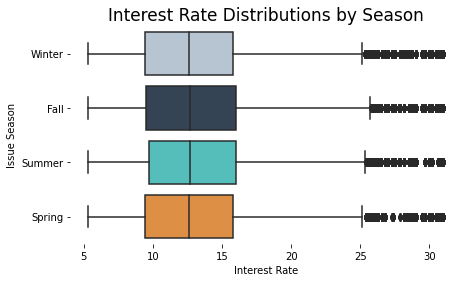

In [13]:
eda_fns.interest_and_season()

# Summary
Interestingly, this analysis found that longer loans have higher interest rates, and more analysis should be done on the underlying reason behind this relationship. Risky loans (those that have defaulted or very late payments) do tend to have lower grades, lower FICO scores, and higher interest rates, as expected. They are composed of a higher percentage of renters, and slightly higher percentage of joint loans. Between risky and non-risky loans, the purposes and employment verification statuses do not seem to vary greatly.

# Future Exploration

Below are a few action items for further analysis:
* research optimal definition of risky
* explore why longer loans have higher interest rate
* continue time series exploration
* preform analysis using percentage of dollar value rather than count